Predict Melbourne house price and use regularization techniques to avoid overfitting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('melb_data.csv')

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
df.insert(0, 'ID', range(1, 1 + len(df)))
df.set_index("ID",inplace=True)

In [5]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
ID,,,,,,,,,,,,,,,,,,,,,
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13576,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13577,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13578,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 1 to 13580
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
df.shape

(13580, 21)

In [8]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [9]:
nullper=(df.isnull().sum()/len(df))*100
print(nullper)

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64


In [10]:
# remove CouncilArea becasue there are in categorical data
df.drop(["CouncilArea"],axis=1,inplace=True)

In [11]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
ID,,,,,,,,,,,,,,,,,,,,
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13576,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13577,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,Western Metropolitan,6380.0
13578,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,Western Metropolitan,6380.0


In [12]:
df['Car']=df['Car'].fillna(df['Car'].mean())
df['BuildingArea']=df['BuildingArea'].fillna(df['BuildingArea'].mean())
df['YearBuilt']=df['YearBuilt'].fillna(df['YearBuilt'].mean())
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 1 to 13580
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  float64
 18  Region

In [14]:
df["Date"].value_counts()

27/05/2017    473
3/06/2017     395
12/08/2017    387
17/06/2017    374
27/11/2016    362
29/07/2017    341
4/03/2017     337
25/02/2017    333
24/06/2017    329
10/12/2016    319
22/07/2017    317
8/07/2017     310
18/03/2017    303
15/10/2016    300
15/07/2017    292
12/11/2016    292
3/12/2016     288
8/04/2017     280
1/07/2017     276
19/11/2016    266
20/05/2017    262
18/06/2016    261
28/05/2016    258
13/05/2017    255
16/09/2017    254
8/10/2016     251
23/09/2017    247
26/08/2017    246
7/05/2016     245
17/09/2016    242
24/09/2016    240
28/08/2016    238
10/09/2016    235
29/04/2017    217
16/04/2016    217
4/06/2016     214
3/09/2017     214
27/06/2016    211
3/09/2016     208
9/09/2017     205
22/05/2016    203
19/08/2017    201
7/11/2016     194
14/05/2016    193
22/08/2016    192
30/07/2016    172
6/08/2016     154
16/07/2016    141
6/05/2017     140
22/04/2017    134
26/07/2016    133
13/08/2016    132
23/04/2016    101
11/02/2017     84
12/06/2016     46
11/03/2017

In [15]:
df["Date"].unique()

array(['3/12/2016', '4/02/2016', '4/03/2017', '4/06/2016', '7/05/2016',
       '8/10/2016', '12/11/2016', '13/08/2016', '14/05/2016',
       '15/10/2016', '16/07/2016', '17/09/2016', '18/03/2017',
       '18/06/2016', '19/11/2016', '22/08/2016', '24/09/2016',
       '25/02/2017', '26/07/2016', '27/11/2016', '28/05/2016',
       '30/07/2016', '3/09/2016', '6/08/2016', '7/11/2016', '10/09/2016',
       '10/12/2016', '11/02/2017', '16/04/2016', '22/05/2016',
       '23/04/2016', '12/06/2016', '27/06/2016', '28/08/2016',
       '11/03/2017', '28/01/2016', '6/05/2017', '8/04/2017', '29/04/2017',
       '13/05/2017', '20/05/2017', '22/04/2017', '1/07/2017', '3/06/2017',
       '17/06/2017', '24/06/2017', '27/05/2017', '8/07/2017',
       '12/08/2017', '15/07/2017', '22/07/2017', '29/07/2017',
       '3/09/2017', '9/09/2017', '16/09/2017', '19/08/2017', '23/09/2017',
       '26/08/2017'], dtype=object)

In [16]:
#because of "/" date is show to object we can replace "/" to ' ' 
df['Date']=pd.to_numeric(df['Date'].str.replace('/','').str.replace(',', ''), errors='coerce')

In [17]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Regionname,Propertycount
ID,,,,,,,,,,,,,,,,,,,,
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3122016,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4022016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4032017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.80930,144.99440,Northern Metropolitan,4019.0
4,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4032017,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.79690,144.99690,Northern Metropolitan,4019.0
5,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4062016,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13576,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26082017,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13577,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26082017,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,-37.85927,144.87904,Western Metropolitan,6380.0
13578,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26082017,6.8,3016.0,3.0,2.0,4.0,436.0,151.96765,1997.000000,-37.85274,144.88738,Western Metropolitan,6380.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 1 to 13580
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  int64  
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  Lattitude      13580 non-null  float64
 17  Longtitude     13580 non-null  float64
 18  Region

In [19]:
df_num=df.select_dtypes(['int64','float64'])

In [20]:
df_num.columns

Index(['Rooms', 'Price', 'Date', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude',
       'Longtitude', 'Propertycount'],
      dtype='object')

In [21]:
df_cat=df.select_dtypes(['object'])

In [22]:
df_cat.columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname'], dtype='object')

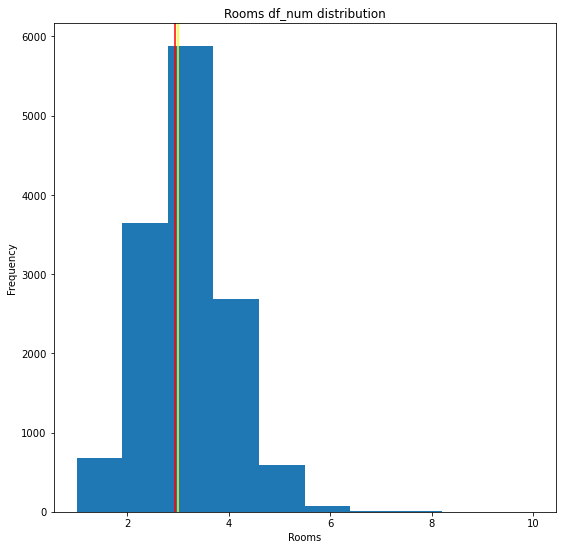

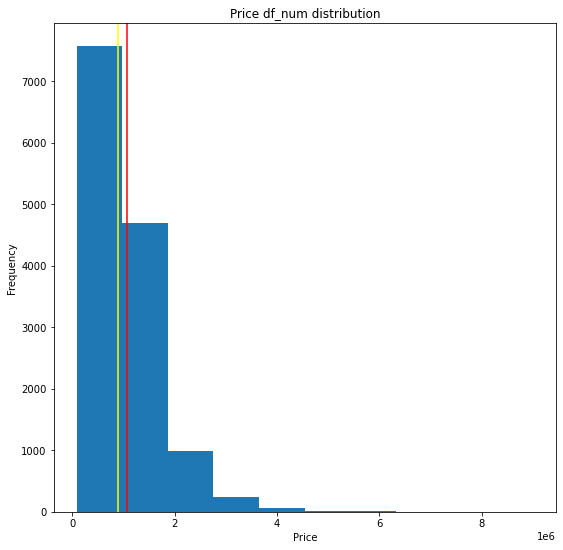

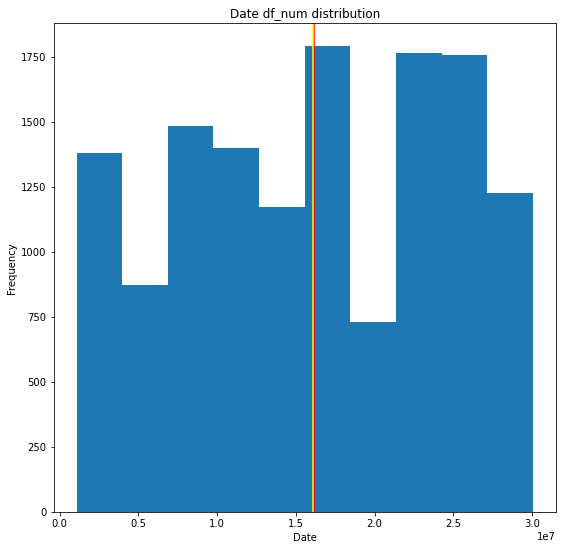

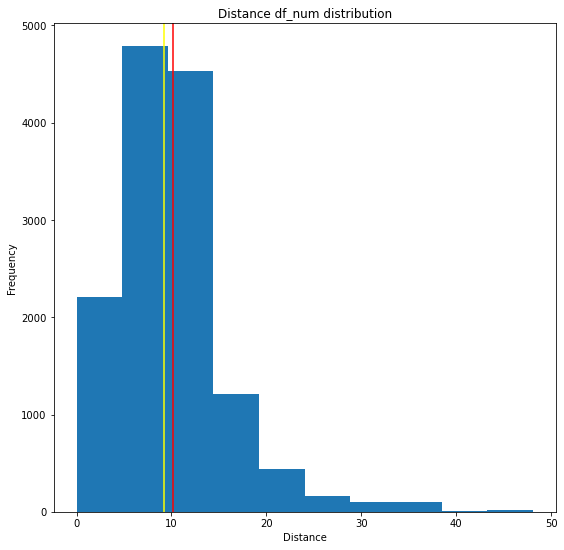

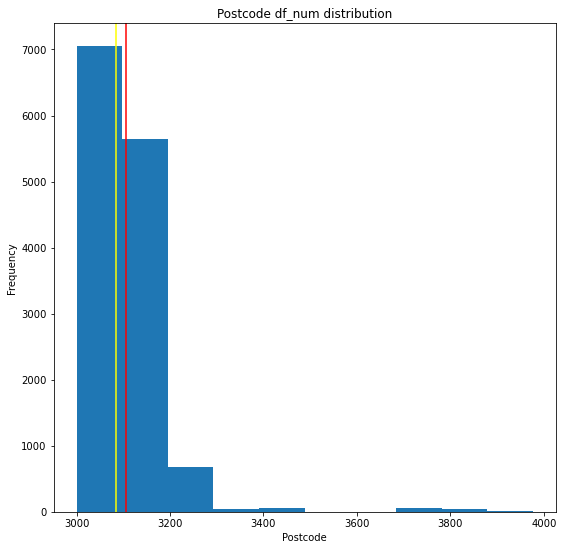

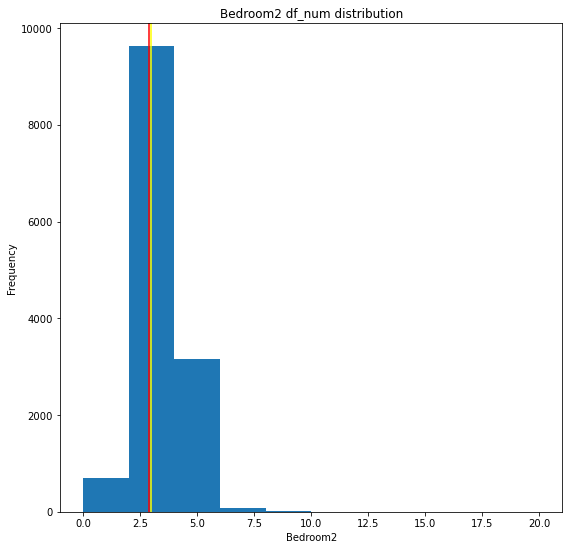

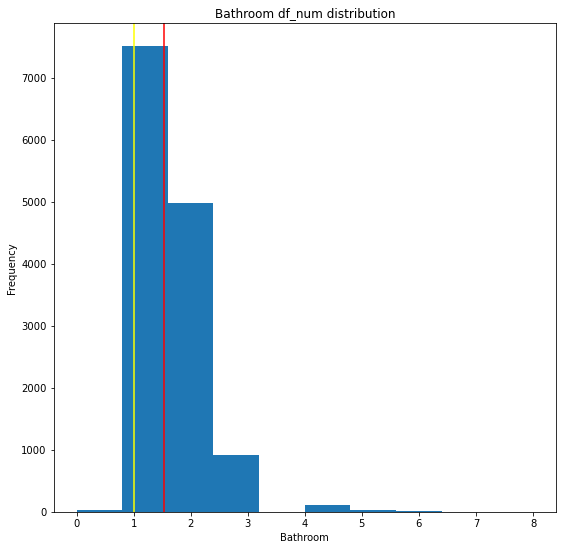

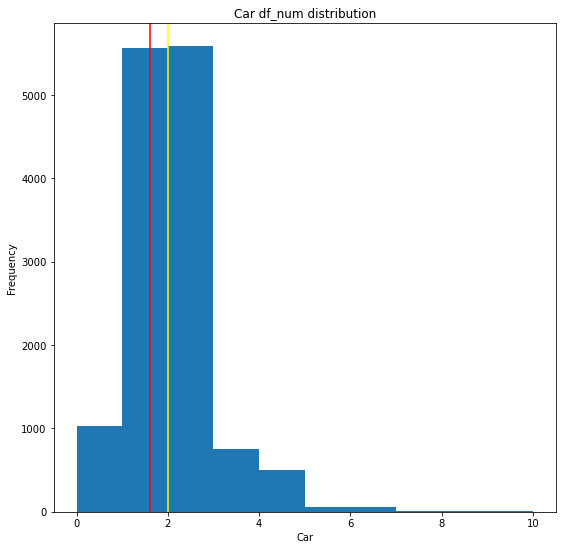

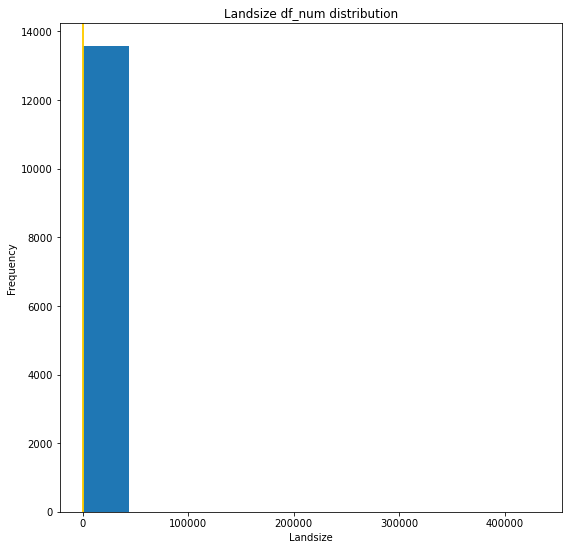

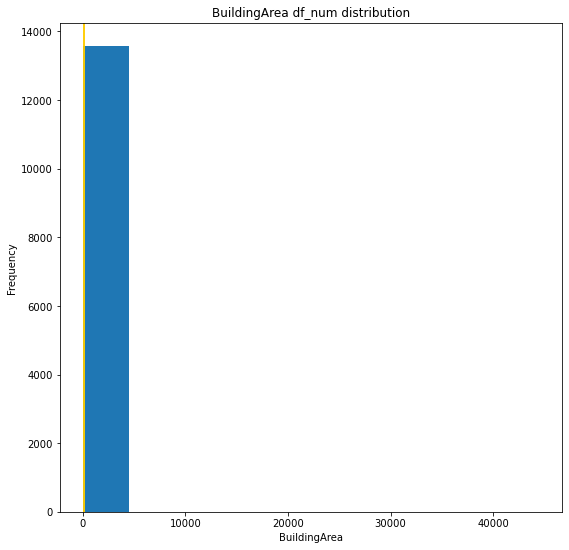

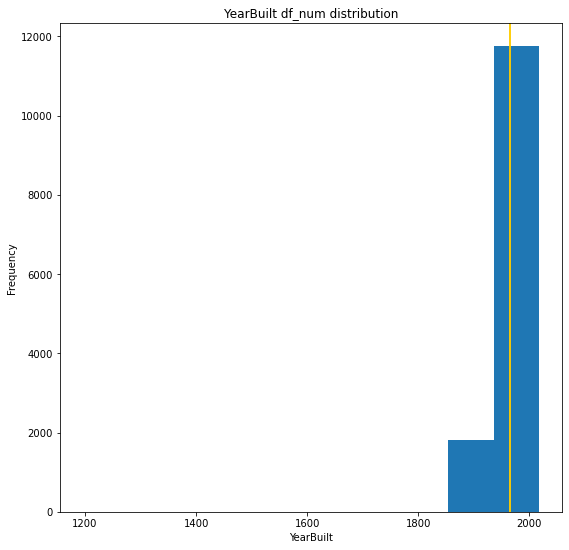

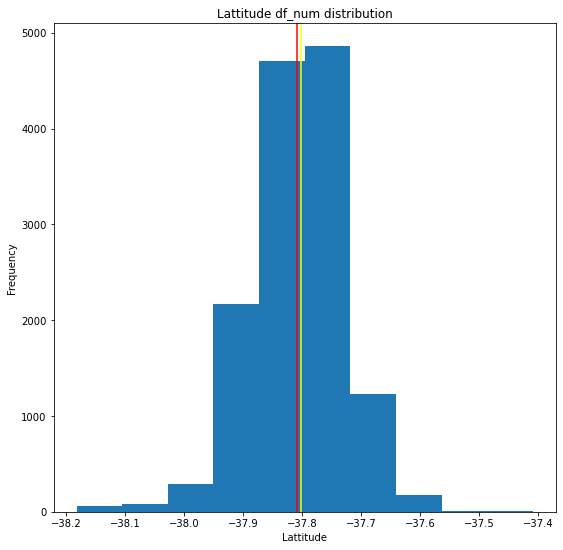

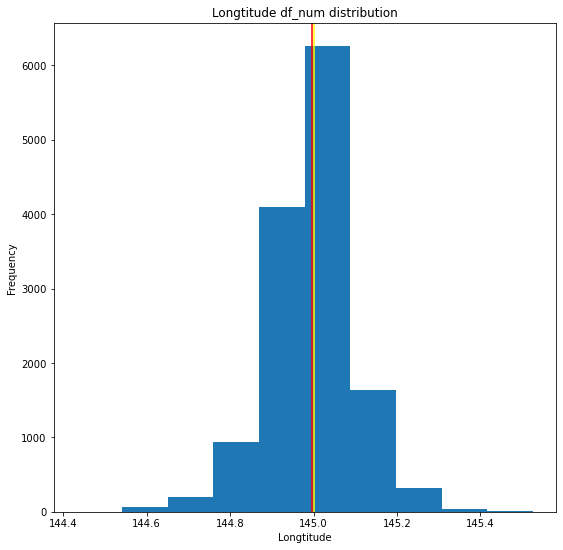

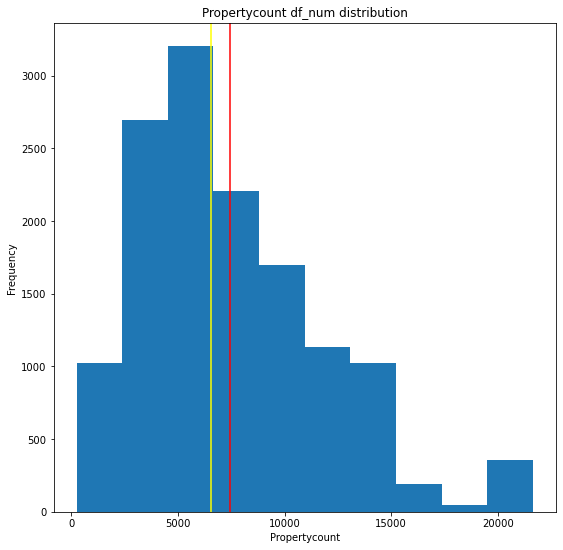

In [23]:
# univariate normal distribution data analysis 
for i in df_num:
    plt.figure(figsize=(9,9))
    plt.hist(df[i],bins=10)
    plt.title("{} df_num distribution".format(i))
    plt.axvline(df[i].mean(),color="red")
    plt.axvline(df[i].median(),color="yellow")
    plt.ylabel("Frequency")
    plt.xlabel(i)
    plt.show()

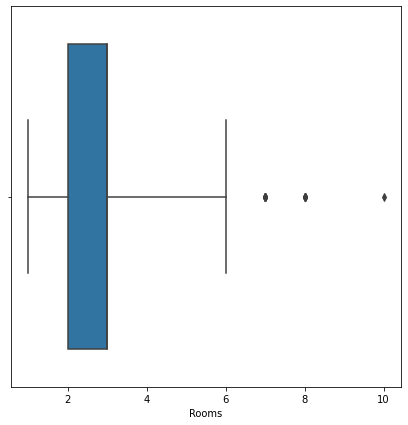

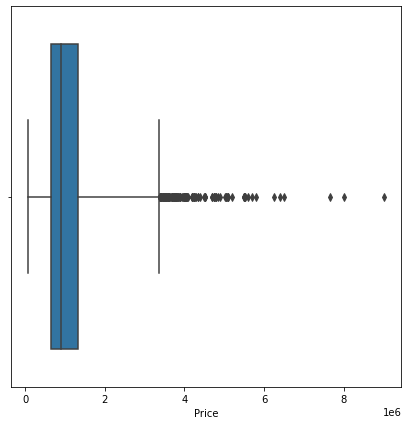

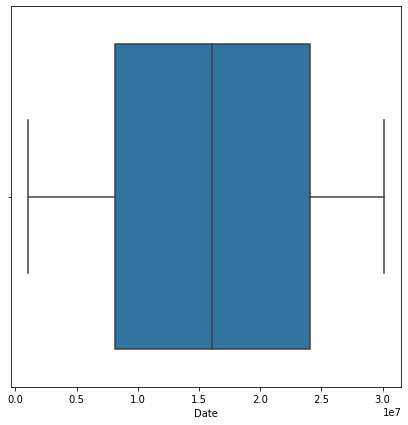

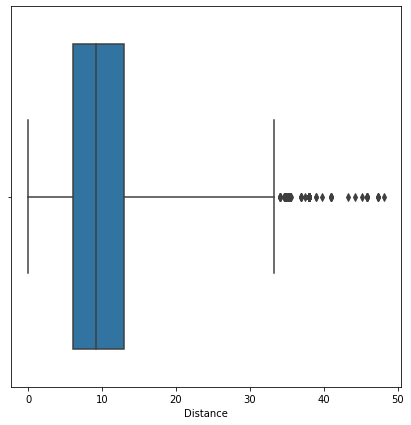

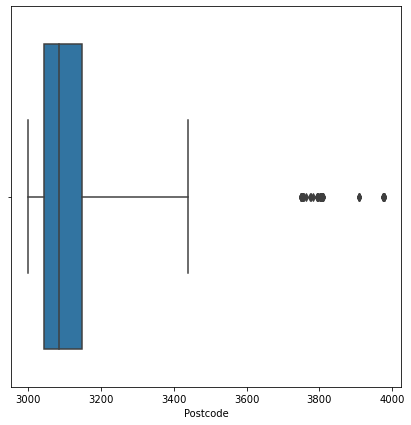

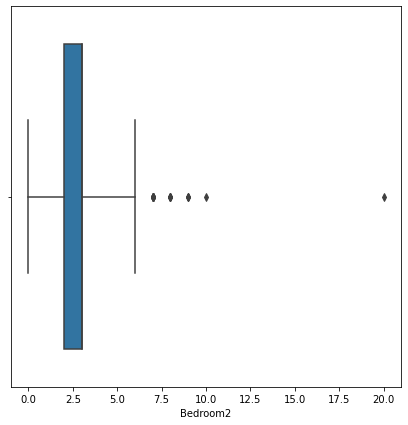

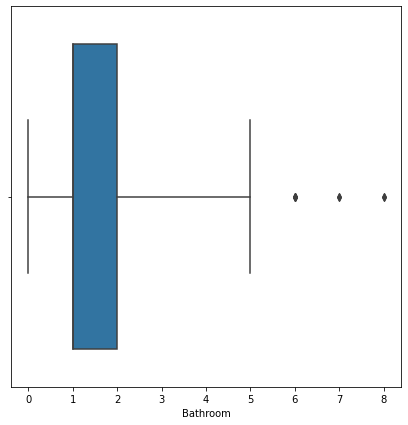

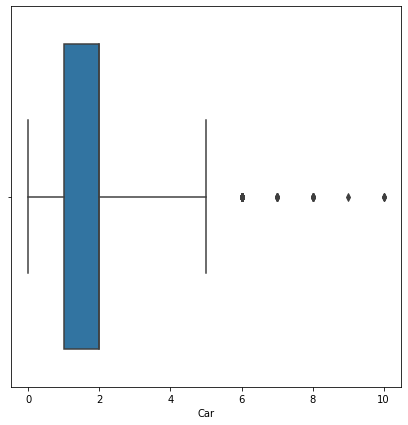

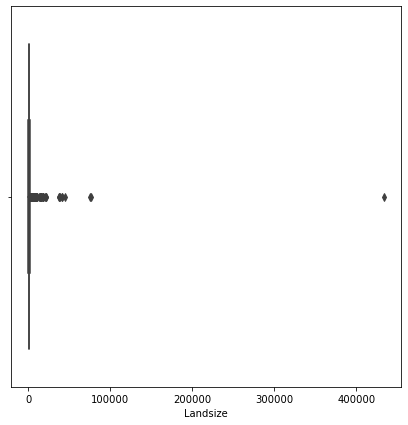

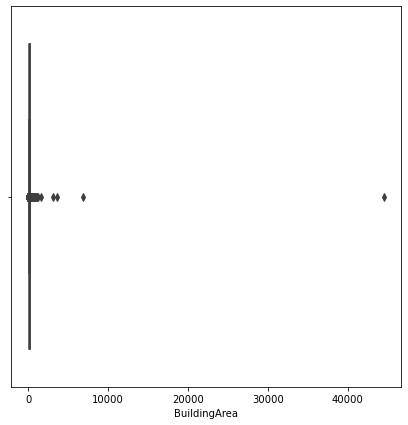

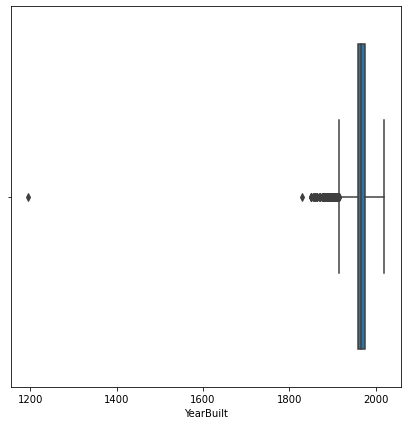

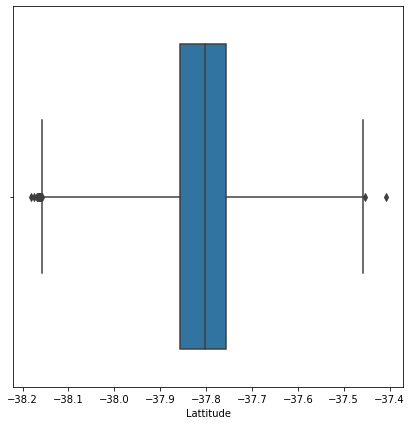

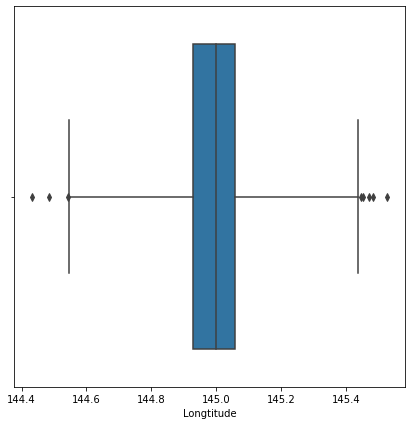

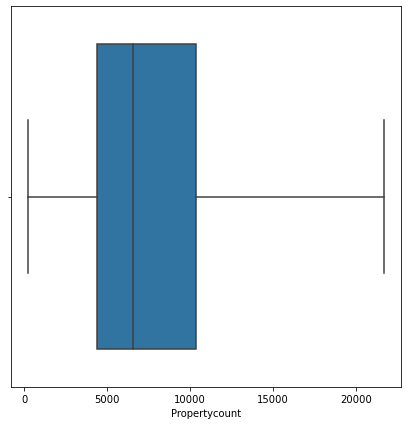

In [24]:
for i in df_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df_num,x=i,whis=3)
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [25]:
df_num.shape

(13580, 14)

In [26]:
# Rooms Column Outlier Treatment 
q1=np.quantile(df_num["Rooms"],0.25)
q3=np.quantile(df_num["Rooms"],0.75)
iqr=q3-q1
print("Quantile1 for Rooms is => ",q1)
print("Quantile3 for Rooms is => ",q3)
print("IQR for Rooms column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

Quantile1 for Rooms is =>  2.0
Quantile3 for Rooms is =>  3.0
IQR for Rooms column is =>  1.0
upper whisker with 3 penalty is =>  6.0


In [27]:
df_num.shape

(13580, 14)

In [28]:
# accept all those records which come below given whisker values
df_num=df_num[df_num["Rooms"]<up_whs]

In [29]:
df_num.shape

(13494, 14)

In [30]:
# Price Column Outlier Treatment 
q1=np.quantile(df_num["Price"],0.25)
q3=np.quantile(df_num["Price"],0.75)
iqr=q3-q1
print("Quantile1 for Price is => ",q1)
print("Quantile3 for Price is => ",q3)
print("IQR for Price column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

Quantile1 for Price is =>  650000.0
Quantile3 for Price is =>  1325000.0
IQR for Price column is =>  675000.0
upper whisker with 3 penalty is =>  3350000.0


In [31]:
df_num.shape

(13494, 14)

In [32]:
# accept all those records which come below given whisker values
df_num=df_num[df_num["Price"]<up_whs]

In [33]:
df_num.shape

(13363, 14)

In [34]:
# Distance Column Outlier Treatment 
q1=np.quantile(df_num["Distance"],0.25)
q3=np.quantile(df_num["Distance"],0.75)
iqr=q3-q1
print("Quantile1 for Distance is => ",q1)
print("Quantile3 for Distance is => ",q3)
print("IQR for Distance column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["Distance"]<up_whs]

Quantile1 for Distance is =>  6.2
Quantile3 for Distance is =>  13.0
IQR for Distance column is =>  6.8
upper whisker with 3 penalty is =>  33.4


In [35]:
df_num.shape

(13235, 14)

In [36]:
# Postcode Column Outlier Treatment 
q1=np.quantile(df_num["Postcode"],0.25)
q3=np.quantile(df_num["Postcode"],0.75)
iqr=q3-q1
print("Quantile1 for Postcode is => ",q1)
print("Quantile3 for Postcode is => ",q3)
print("IQR for Postcode column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["Postcode"]<up_whs]

Quantile1 for Postcode is =>  3044.0
Quantile3 for Postcode is =>  3147.0
IQR for Postcode column is =>  103.0
upper whisker with 3 penalty is =>  3456.0


In [37]:
df_num.shape

(13172, 14)

In [38]:
# Bedroom2 Column Outlier Treatment 
q1=np.quantile(df_num["Bedroom2"],0.25)
q3=np.quantile(df_num["Bedroom2"],0.75)
iqr=q3-q1
print("Quantile1 for Bedroom2 is => ",q1)
print("Quantile3 for Bedroom2 is => ",q3)
print("IQR for Bedroom2 column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["Bedroom2"]<up_whs]

Quantile1 for Bedroom2 is =>  2.0
Quantile3 for Bedroom2 is =>  3.0
IQR for Bedroom2 column is =>  1.0
upper whisker with 3 penalty is =>  6.0


In [39]:
df_num.shape

(13165, 14)

In [40]:
# Bathroom  Column Outlier Treatment 
q1=np.quantile(df_num["Bathroom"],0.25)
q3=np.quantile(df_num["Bathroom"],0.75)
iqr=q3-q1
print("Quantile1 for Bathroom  is => ",q1)
print("Quantile3 for Bathroom  is => ",q3)
print("IQR for Bathroom  column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["Bathroom"]<up_whs]

Quantile1 for Bathroom  is =>  1.0
Quantile3 for Bathroom  is =>  2.0
IQR for Bathroom  column is =>  1.0
upper whisker with 3 penalty is =>  5.0


In [41]:
df_num.shape

(13142, 14)

In [42]:
# Car  Column Outlier Treatment 
q1=np.quantile(df_num["Car"],0.25)
q3=np.quantile(df_num["Car"],0.75)
iqr=q3-q1
print("Quantile1 for Car  is => ",q1)
print("Quantile3 for Car  is => ",q3)
print("IQR for Car  column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["Car"]<up_whs]

Quantile1 for Car  is =>  1.0
Quantile3 for Car  is =>  2.0
IQR for Car  column is =>  1.0
upper whisker with 3 penalty is =>  5.0


In [43]:
df_num.shape

(13020, 14)

In [44]:
# Landsize Column Outlier Treatment 
q1=np.quantile(df_num["Landsize"],0.25)
q3=np.quantile(df_num["Landsize"],0.75)
iqr=q3-q1
print("Quantile1 for Landsize  is => ",q1)
print("Quantile3 for Landsize  is => ",q3)
print("IQR for Car  column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["Landsize"]<up_whs]

Quantile1 for Landsize  is =>  168.0
Quantile3 for Landsize  is =>  646.0
IQR for Car  column is =>  478.0
upper whisker with 3 penalty is =>  2080.0


In [45]:
df_num.shape

(12818, 14)

In [46]:
# BuildingArea Column Outlier Treatment 
q1=np.quantile(df_num["BuildingArea"],0.25)
q3=np.quantile(df_num["BuildingArea"],0.75)
iqr=q3-q1
print("Quantile1 for BuildingArea  is => ",q1)
print("Quantile3 for BuildingArea  is => ",q3)
print("IQR for BuildingArea  column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["BuildingArea"]<up_whs]

Quantile1 for BuildingArea  is =>  120.0
Quantile3 for BuildingArea  is =>  151.96764988779805
IQR for BuildingArea  column is =>  31.967649887798046
upper whisker with 3 penalty is =>  247.87059955119219


In [47]:
df_num.shape

(12299, 14)

In [48]:
# YearBuilt Column Outlier Treatment 
q1=np.quantile(df_num["YearBuilt"],0.25)
q3=np.quantile(df_num["YearBuilt"],0.75)
iqr=q3-q1
print("Quantile1 for YearBuilt  is => ",q1)
print("Quantile3 for YearBuilt  is => ",q3)
print("IQR for YearBuilt  column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["YearBuilt"]<up_whs]

df_num.shape

Quantile1 for YearBuilt  is =>  1960.0
Quantile3 for YearBuilt  is =>  1970.0
IQR for YearBuilt  column is =>  10.0
upper whisker with 3 penalty is =>  2000.0


(10625, 14)

In [49]:
# Lattitude Column Outlier Treatment 
q1=np.quantile(df_num["Lattitude"],0.25)
q3=np.quantile(df_num["Lattitude"],0.75)
iqr=q3-q1
print("Quantile1 for Lattitude  is => ",q1)
print("Quantile3 for Lattitude  is => ",q3)
print("IQR for Lattitude  column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["Lattitude"]<up_whs]

df_num.shape

Quantile1 for Lattitude  is =>  -37.856359999999995
Quantile3 for Lattitude  is =>  -37.7559
IQR for Lattitude  column is =>  0.10045999999999822
upper whisker with 3 penalty is =>  -37.45452


(10625, 14)

In [50]:
# Longtitude Column Outlier Treatment 
q1=np.quantile(df_num["Longtitude"],0.25)
q3=np.quantile(df_num["Longtitude"],0.75)
iqr=q3-q1
print("Quantile1 for Longtitude  is => ",q1)
print("Quantile3 for Longtitude  is => ",q3)
print("IQR for Longtitude  column is => ",iqr)
#as we know we have higher extream values so no need to calculate lower whisker will only go for upper whisker 
up_whs=q3+3*iqr
print("upper whisker with 3 penalty is => ",up_whs)

# accept all those records which come below given whisker values
df_num=df_num[df_num["Longtitude"]<up_whs]

df_num.shape

Quantile1 for Longtitude  is =>  144.9316
Quantile3 for Longtitude  is =>  145.0565
IQR for Longtitude  column is =>  0.12489999999999668
upper whisker with 3 penalty is =>  145.4312


(10625, 14)

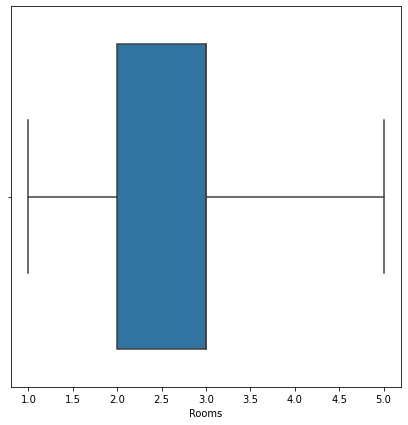

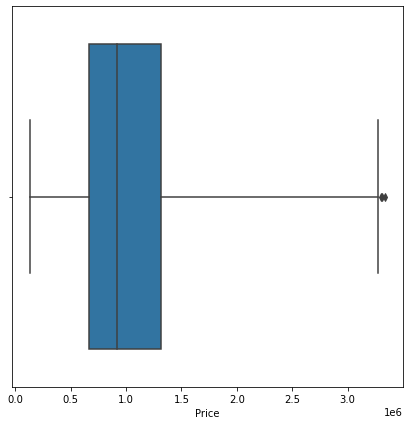

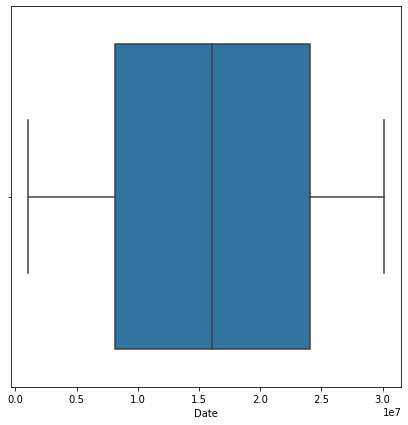

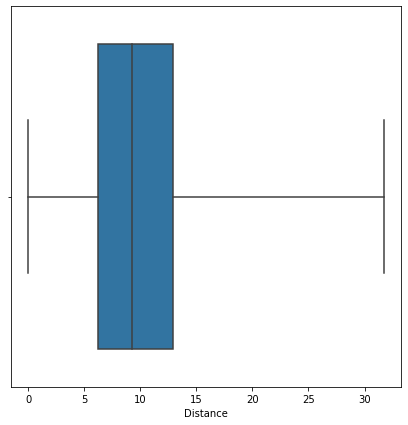

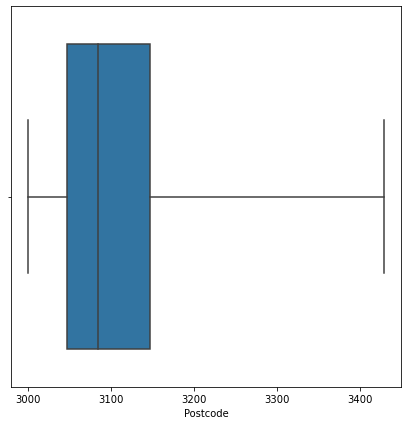

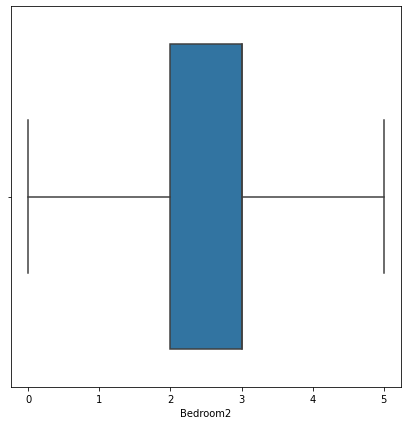

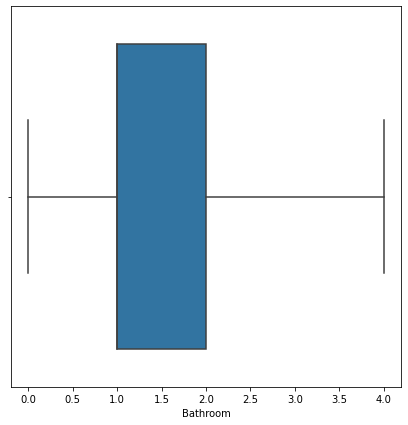

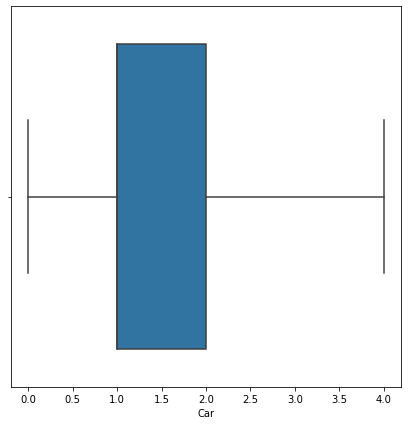

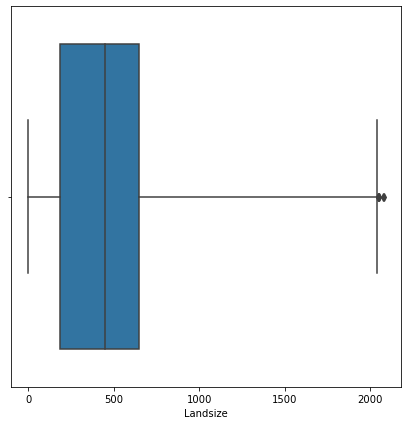

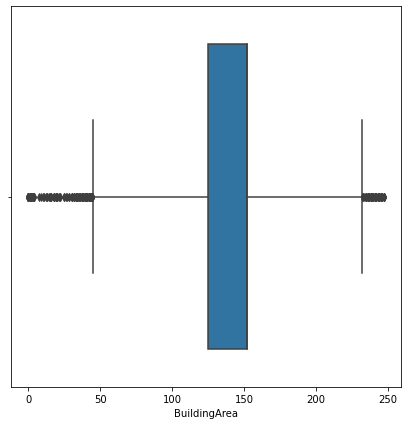

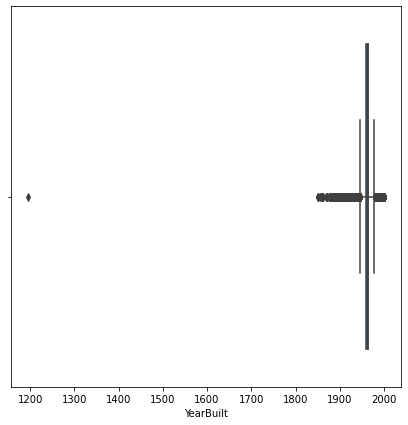

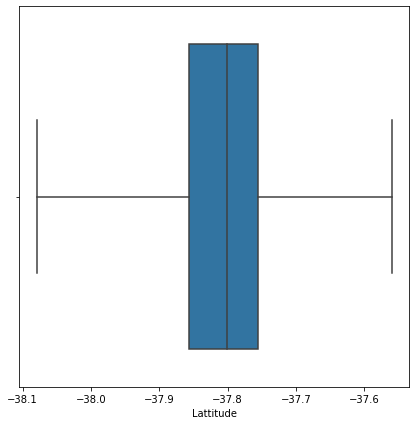

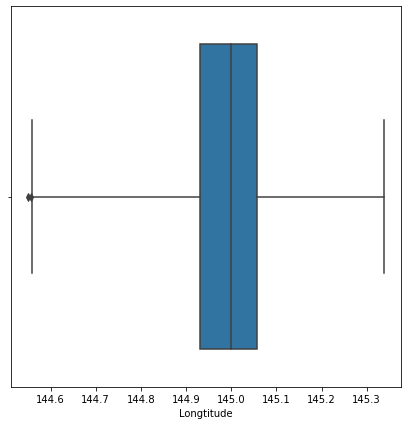

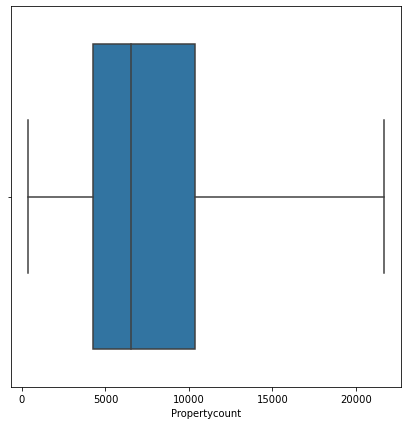

In [51]:
for i in df_num:
    plt.figure(figsize=(7,7))
    sns.boxplot(data=df_num,x=i,whis=3)
    # upper whisker = q3+1.5*IQR
    # lower whisker = q1 - 1.5*IQR 
    # boxplot will calculate upper whisker and lower whisker by it's own and the nit will plot the box
    plt.show()

In [52]:
from scipy.stats import skew

In [53]:
# Skew = 3 * (Mean – Median) / Standard Deviation.
for i in df_num:
    print(i,skew(df_num[i]))

#data skewness > -1 and < 1 that means data is normally distributed 

Rooms 0.09257188052133325
Price 1.1877273882237815
Date -0.08200773551344899
Distance 1.037289679798192
Postcode 0.7487817167630078
Bedroom2 0.07629541355793812
Bathroom 1.0854712234221415
Car 0.5773445444737243
Landsize 0.705283901150437
BuildingArea -0.8551271815732407
YearBuilt -4.207763504606519
Lattitude -0.21779887595131195
Longtitude -0.30166927046556385
Propertycount 1.0781062109626174


Rooms 0.09257188052133325


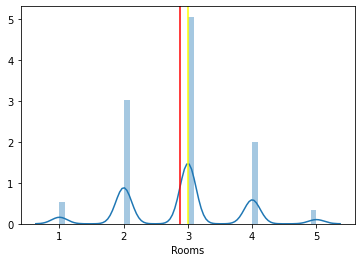

Price 1.1877273882237815


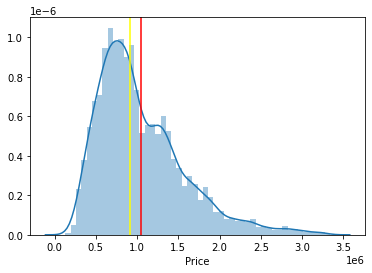

Date -0.08200773551344899


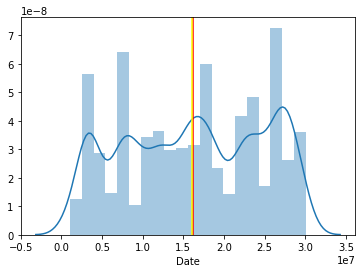

Distance 1.037289679798192


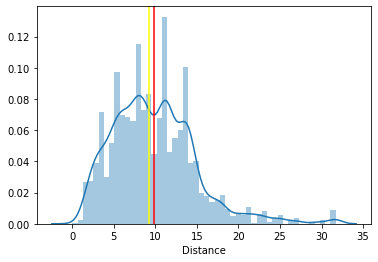

Postcode 0.7487817167630078


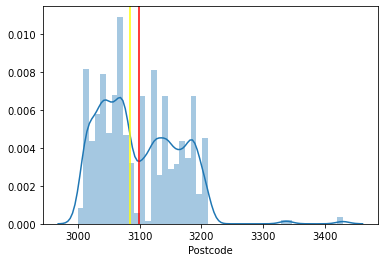

Bedroom2 0.07629541355793812


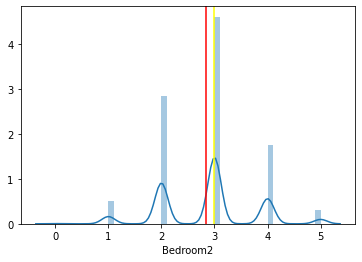

Bathroom 1.0854712234221415


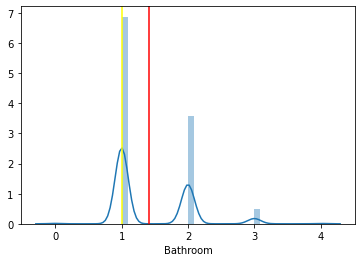

Car 0.5773445444737243


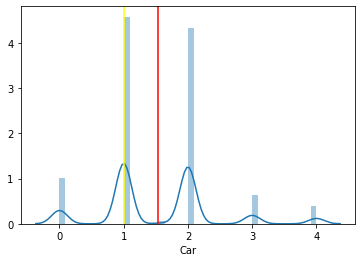

Landsize 0.705283901150437


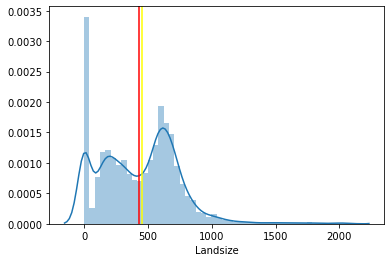

BuildingArea -0.8551271815732407


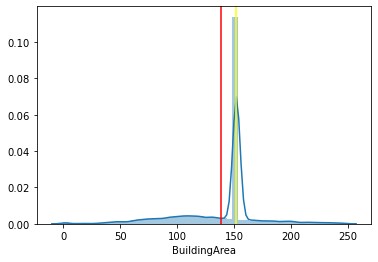

YearBuilt -4.207763504606519


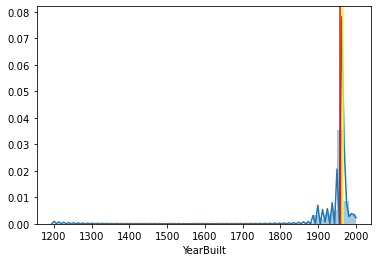

Lattitude -0.21779887595131195


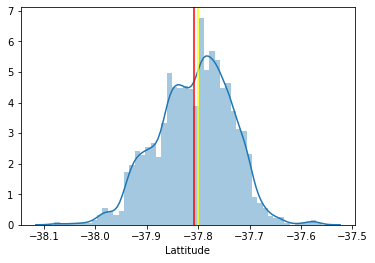

Longtitude -0.30166927046556385


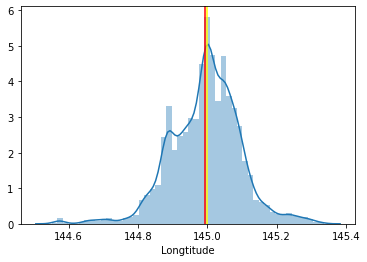

Propertycount 1.0781062109626174


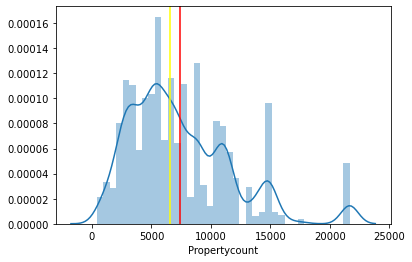

In [54]:
for col in df_num:
    print(col,skew(df_num[col]))
    plt.figure()
    sns.distplot(df_num[col])
    plt.axvline(df_num[col].mean(),color="red")
    plt.axvline(df_num[col].median(),color="yellow")
    plt.show()

In [55]:
# the columns which skewness values is >=1 and <= -1 those columns skewness we will reduce 
df_num_sqrt=df_num.copy()
for col in df_num_sqrt:
    if skew(df_num_sqrt[col]) >=1 or skew(df_num_sqrt[col])<=-1:
        df_num_sqrt[col]=np.sqrt(df_num_sqrt[col])

In [56]:
df_num_sqrt

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
ID,,,,,,,,,,,,,,
1,2,1216.552506,3122016,1.581139,3067.0,2.0,1.000000,1.0,202.0,151.96765,44.324759,-37.79960,144.99840,63.395583
2,2,1017.349497,4022016,1.581139,3067.0,2.0,1.000000,0.0,156.0,79.00000,43.588989,-37.80790,144.99340,63.395583
3,3,1210.371844,4032017,1.581139,3067.0,3.0,1.414214,0.0,134.0,150.00000,43.588989,-37.80930,144.99440,63.395583
4,3,921.954446,4032017,1.581139,3067.0,3.0,1.414214,1.0,94.0,151.96765,44.324759,-37.79690,144.99690,63.395583
6,2,970.051545,7052016,1.581139,3067.0,2.0,1.000000,0.0,181.0,151.96765,44.324759,-37.80410,144.99530,63.395583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,3,762.889245,26082017,4.062019,3049.0,3.0,1.414214,2.0,256.0,151.96765,44.324759,-37.67917,144.89390,49.739320
13576,4,1115.795680,26082017,4.086563,3150.0,4.0,1.414214,2.0,652.0,151.96765,44.508426,-37.90562,145.16761,85.976741
13577,3,1015.381702,26082017,2.607681,3016.0,3.0,1.414214,2.0,333.0,133.00000,44.665423,-37.85927,144.87904,79.874902


In [57]:
# Skew = 3 * (Mean – Median) / Standard Deviation.
for i in df_num:
    print(i,skew(df_num[i]))

#data skewness > -1 and < 1 that means data is normally distributed 

Rooms 0.09257188052133325
Price 1.1877273882237815
Date -0.08200773551344899
Distance 1.037289679798192
Postcode 0.7487817167630078
Bedroom2 0.07629541355793812
Bathroom 1.0854712234221415
Car 0.5773445444737243
Landsize 0.705283901150437
BuildingArea -0.8551271815732407
YearBuilt -4.207763504606519
Lattitude -0.21779887595131195
Longtitude -0.30166927046556385
Propertycount 1.0781062109626174


In [58]:
df_num_minmaxscale=df_num.copy()

In [59]:
df_num_minmaxscale

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
ID,,,,,,,,,,,,,,
1,2,1480000.0,3122016,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,4019.0
2,2,1035000.0,4022016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,4019.0
3,3,1465000.0,4032017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.80930,144.99440,4019.0
4,3,850000.0,4032017,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.79690,144.99690,4019.0
6,2,941000.0,7052016,2.5,3067.0,2.0,1.0,0.0,181.0,151.96765,1964.684217,-37.80410,144.99530,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,3,582000.0,26082017,16.5,3049.0,3.0,2.0,2.0,256.0,151.96765,1964.684217,-37.67917,144.89390,2474.0
13576,4,1245000.0,26082017,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,-37.90562,145.16761,7392.0
13577,3,1031000.0,26082017,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,-37.85927,144.87904,6380.0


In [60]:
from sklearn.preprocessing  import MinMaxScaler
scaler=MinMaxScaler()

# it always return series but i need dataframe 
# house_num_minmaxscale =scaler.fit_transform(house_num_minmaxscale)
# dataframe 
df_num_minmaxscale = pd.DataFrame(scaler.fit_transform(df_num_minmaxscale.values),
                                     columns=df_num_minmaxscale.columns,
                                     index=df_num_minmaxscale.index)

In [61]:
for i in df_num_minmaxscale:
    print(i,skew(df_num_minmaxscale[i]))

Rooms 0.09257188052133225
Price 1.1877273882237798
Date -0.08200773551344874
Distance 1.037289679798192
Postcode 0.7487817167630113
Bedroom2 0.0762954135579381
Bathroom 1.0854712234221415
Car 0.5773445444737243
Landsize 0.7052839011504373
BuildingArea -0.855127181573238
YearBuilt -4.207763504606548
Lattitude -0.2177988759515651
Longtitude -0.30166927046549424
Propertycount 1.078106210962616


In [62]:
# 1) if we want to apply standered scaler than first remove outliers 
# if there is high outliers or low outliers we will not get standered or standered normal distribution data
# Standered scaler 
# newx=(x-mean)/sd
df_num_standered_scale=df_num.copy()
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_num_standered_scale = pd.DataFrame(scaler.fit_transform(df_num_standered_scale.values),
                                     columns=df_num_standered_scale.columns,
                                     index=df_num_standered_scale.index)



In [63]:
for i in df_num_standered_scale:
    print(i,skew(df_num_standered_scale[i]))

Rooms 0.09257188052133287
Price 1.1877273882237815
Date -0.082007735513449
Distance 1.0372896797981925
Postcode 0.7487817167630111
Bedroom2 0.0762954135579384
Bathroom 1.0854712234221415
Car 0.5773445444737242
Landsize 0.7052839011504372
BuildingArea -0.8551271815732402
YearBuilt -4.207763504606541
Lattitude -0.21779887595156502
Longtitude -0.30166927046549896
Propertycount 1.0781062109626172


In [64]:
df_cat

,Suburb,Address,Type,Method,SellerG,Regionname
ID,,,,,,
1,Abbotsford,85 Turner St,h,S,Biggin,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,Northern Metropolitan
3,Abbotsford,5 Charles St,h,SP,Biggin,Northern Metropolitan
4,Abbotsford,40 Federation La,h,PI,Biggin,Northern Metropolitan
5,Abbotsford,55a Park St,h,VB,Nelson,Northern Metropolitan
...,...,...,...,...,...,...
13576,Wheelers Hill,12 Strada Cr,h,S,Barry,South-Eastern Metropolitan
13577,Williamstown,77 Merrett Dr,h,SP,Williams,Western Metropolitan
13578,Williamstown,83 Power St,h,S,Raine,Western Metropolitan


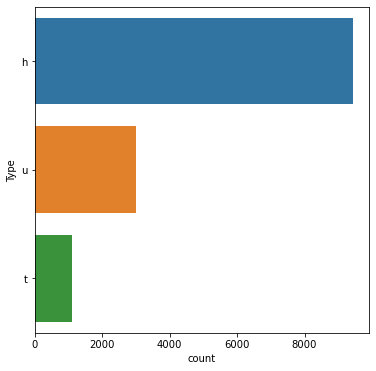

In [65]:
#countplot univariate graphical analysis 
plt.figure(figsize=(6,6))
sns.countplot(data=df_cat,y="Type")
plt.show()

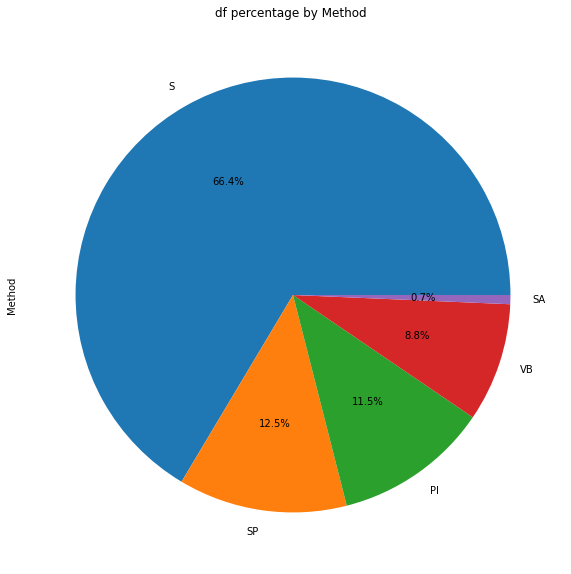

In [66]:
# graphical analysis on categorical column Method data share percentage 
# using pie plot 
plt.figure(figsize=(10,10))
df_cat['Method'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("df percentage by Method ")
plt.show()

In [67]:
from sklearn.preprocessing import LabelEncoder 

In [68]:
df_cat.columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname'], dtype='object')

In [69]:
le=LabelEncoder()
for col in df_cat:
    df_cat[col]=le.fit_transform(df_cat[col])

In [70]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 1 to 13580
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Suburb      13580 non-null  int32
 1   Address     13580 non-null  int32
 2   Type        13580 non-null  int32
 3   Method      13580 non-null  int32
 4   SellerG     13580 non-null  int32
 5   Regionname  13580 non-null  int32
dtypes: int32(6)
memory usage: 1.0 MB


In [71]:
df_cat

,Suburb,Address,Type,Method,SellerG,Regionname
ID,,,,,,
1,0,12794,0,1,23,2
2,0,5943,0,1,23,2
3,0,9814,0,3,23,2
4,0,9004,0,0,23,2
5,0,10589,0,4,155,2
...,...,...,...,...,...,...
13576,302,1991,0,1,16,4
13577,305,12234,0,3,251,6
13578,305,12745,0,1,194,6


In [78]:
df_new=pd.merge(df_num,df_cat,on="ID")

In [79]:
df_new

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Suburb,Address,Type,Method,SellerG,Regionname
ID,,,,,,,,,,,,,,,,,,,,
1,2,1480000.0,3122016,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.79960,144.99840,4019.0,0,12794,0,1,23,2
2,2,1035000.0,4022016,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.80790,144.99340,4019.0,0,5943,0,1,23,2
3,3,1465000.0,4032017,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.80930,144.99440,4019.0,0,9814,0,3,23,2
4,3,850000.0,4032017,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.79690,144.99690,4019.0,0,9004,0,0,23,2
6,2,941000.0,7052016,2.5,3067.0,2.0,1.0,0.0,181.0,151.96765,1964.684217,-37.80410,144.99530,4019.0,0,2195,0,1,106,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,3,582000.0,26082017,16.5,3049.0,3.0,2.0,2.0,256.0,151.96765,1964.684217,-37.67917,144.89390,2474.0,301,12919,0,1,200,2
13576,4,1245000.0,26082017,16.7,3150.0,4.0,2.0,2.0,652.0,151.96765,1981.000000,-37.90562,145.16761,7392.0,302,1991,0,1,16,4
13577,3,1031000.0,26082017,6.8,3016.0,3.0,2.0,2.0,333.0,133.00000,1995.000000,-37.85927,144.87904,6380.0,305,12234,0,3,251,6


In [80]:
# import required modules 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [81]:
x=df_new.drop("Price",axis=1)
y=df_new["Price"]

In [82]:
#test Train model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [83]:
# Model Training 
lr=LinearRegression() # object will be created
# llearning model on given data 
# use theta0+theta1x to calculate bestfit prediction line 
lr.fit(x_train,y_train)

LinearRegression()

In [84]:
# now model is trained and ready to predict 
# but before we use it for prediction let's check it's accuracy 
y_pred=lr.predict(x_test)

In [85]:
y_test # x_test original   y
y_pred # prediction x_test yhat 

# MSE = sum((y-yhat)**2)/n 

array([ 999226.66768926, 1032505.00162095,  709435.92563695, ...,
       1094392.33334225,  704731.68287647, 1265402.99711725])

In [86]:
y_test

ID
2282      660000.0
12147     558500.0
5081      611000.0
11017     900000.0
867      1352000.0
           ...    
7318      636500.0
707      1100000.0
2559     1116000.0
3267      526000.0
4397     1335000.0
Name: Price, Length: 3188, dtype: float64

In [87]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [88]:
mse=mean_squared_error(y_test,y_pred)
r2score=r2_score(y_test,y_pred)
print(" accuracy MSE is {} ".format(mse))
print(" accuracy R2 score is {} ".format(r2score))

 accuracy MSE is 95747110267.39392 
 accuracy R2 score is 0.6520276400545707 


# Base Line Model

In [89]:
# import required modules 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [90]:
lr=LinearRegression() # this is multiple linear regression soo features of df we using for training 
lr.fit(x_train,y_train)
print("Training r2 score => ",lr.score(x_train,y_train))
print("Testing r2 score =? ",lr.score(x_test,y_test))

Training r2 score =>  0.651942950389292
Testing r2 score =?  0.6520276400545707


In [91]:
x_train.columns

Index(['Rooms', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Suburb', 'Address', 'Type', 'Method', 'SellerG',
       'Regionname'],
      dtype='object')

In [92]:
lr.coef_ # slop all features

array([ 9.91980328e+04,  1.33301127e-04, -5.28198996e+04,  1.89847004e+03,
        5.43342009e+04,  1.35860445e+05,  3.37704516e+04,  2.47891076e+02,
        1.41282979e+03, -1.94373575e+03, -6.81644589e+05,  9.77908199e+05,
       -1.32147266e+00, -3.22871912e+02, -1.17139057e+00, -1.98143907e+05,
       -9.12729187e+03, -1.25779538e+02,  2.76720986e+04])

In [93]:
coef=dict(zip(x_train.columns,lr.coef_))

In [94]:
coef

{'Rooms': 99198.03281283398,
 'Date': 0.00013330112668202344,
 'Distance': -52819.899570861446,
 'Postcode': 1898.470043264754,
 'Bedroom2': 54334.200937225156,
 'Bathroom': 135860.445485741,
 'Car': 33770.45160899575,
 'Landsize': 247.8910758657678,
 'BuildingArea': 1412.829793100827,
 'YearBuilt': -1943.735751730575,
 'Lattitude': -681644.5887296766,
 'Longtitude': 977908.1992668532,
 'Propertycount': -1.3214726604118496,
 'Suburb': -322.87191172182185,
 'Address': -1.171390566227035,
 'Type': -198143.90699961965,
 'Method': -9127.291869489685,
 'SellerG': -125.77953788058385,
 'Regionname': 27672.098592345814}

# regularization

In [95]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge 

# Ridge 

In [96]:
# Ridge = l2 
# theta0+theta1x1+(e**2)
print("Rdige Score r2 score with 10 panelty")
for i in range(1,10):
    r=Ridge(i)
    r.fit(x_train,y_train)
    print("panelty {} rscore training {} rscore testing {}".format(i,r.score(x_train,y_train),r.score(x_test,y_test)))

Rdige Score r2 score with 10 panelty
panelty 1 rscore training 0.6519279856834922 rscore testing 0.6520570493240375
panelty 2 rscore training 0.6518857490511655 rscore testing 0.6520585966672559
panelty 3 rscore training 0.6518198133699957 rscore testing 0.6520357418925613
panelty 4 rscore training 0.6517332744065816 rscore testing 0.6519915029873844
panelty 5 rscore training 0.6516288265817589 rscore testing 0.6519285225136386
panelty 6 rscore training 0.6515088234910312 rscore testing 0.6518491214160094
panelty 7 rscore training 0.6513753271330767 rscore testing 0.6517553433689669
panelty 8 rscore training 0.6512301485264866 rscore testing 0.6516489917964203
panelty 9 rscore training 0.6510748816005625 rscore testing 0.6515316610815733


In [97]:
# as panelty 5 is regularised so we will train our final model with 6 error in ridge r=Ridge(6)
r=Ridge(5)
r.fit(x_train,y_train)
print("panelty {} rscore training {} rscore testing {}".format(5,r.score(x_train,y_train),r.score(x_test,y_test)))

panelty 5 rscore training 0.6516288265817589 rscore testing 0.6519285225136386


In [98]:
r.coef_ # coef /slop is minimized 

array([ 9.98358705e+04,  1.30080649e-04, -5.28950695e+04,  2.01540556e+03,
        5.44408783e+04,  1.36341701e+05,  3.40851024e+04,  2.49888459e+02,
        1.42683798e+03, -1.96001418e+03, -5.97434782e+05,  8.87529481e+05,
       -1.50099771e+00, -3.36985864e+02, -1.15097468e+00, -1.95998277e+05,
       -9.21557305e+03, -1.25044342e+02,  2.62194851e+04])

In [99]:
coef=pd.Series(r.coef_,x_train.columns.sort_values())

In [100]:
coef

Address           99835.870458
Bathroom              0.000130
Bedroom2         -52895.069529
BuildingArea       2015.405559
Car               54440.878288
Date             136341.701213
Distance          34085.102442
Landsize            249.888459
Lattitude          1426.837984
Longtitude        -1960.014179
Method          -597434.781514
Postcode         887529.480510
Propertycount        -1.500998
Regionname         -336.985864
Rooms                -1.150975
SellerG         -195998.277485
Suburb            -9215.573046
Type               -125.044342
YearBuilt         26219.485093
dtype: float64

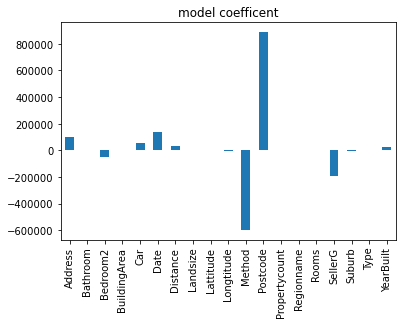

In [101]:
coef.plot(kind="bar",title="model coefficent")
plt.show()

# Lasso

In [102]:
print("Lasso Score r2 score with 10 panelty")
for i in range(1,1000,10):
    l=Lasso(i)
    l.fit(x_train,y_train)
    print("panelty {} rscore training {} rscore testing {}".format(i,l.score(x_train,y_train),l.score(x_test,y_test)))

Lasso Score r2 score with 10 panelty
panelty 1 rscore training 0.6519429490001911 rscore testing 0.6520280932569114
panelty 11 rscore training 0.6519427823076633 rscore testing 0.6520324761453398
panelty 21 rscore training 0.6519423377942547 rscore testing 0.6520365878788714
panelty 31 rscore training 0.6519416154599671 rscore testing 0.6520404284574585
panelty 41 rscore training 0.6519406153048011 rscore testing 0.652043997881108
panelty 51 rscore training 0.6519393373287534 rscore testing 0.6520472961498901
panelty 61 rscore training 0.6519377815318272 rscore testing 0.6520503232636887
panelty 71 rscore training 0.651935947914021 rscore testing 0.6520530792227308
panelty 81 rscore training 0.6519338364753362 rscore testing 0.6520555640268312
panelty 91 rscore training 0.6519314472157705 rscore testing 0.6520577776759918
panelty 101 rscore training 0.6519287801353262 rscore testing 0.6520597201702082
panelty 111 rscore training 0.6519258352340034 rscore testing 0.6520613915094784
pane

In [103]:
l=Lasso(11)
l.fit(x_train,y_train)
print("panelty {} rscore training {} rscore testing {}".format(11,l.score(x_train,y_train),l.score(x_test,y_test)))

panelty 11 rscore training 0.6519427823076633 rscore testing 0.6520324761453398


In [104]:
l.coef_

array([ 9.92189457e+04,  1.33240261e-04, -5.28208219e+04,  1.90117539e+03,
        5.43233496e+04,  1.35846852e+05,  3.37644280e+04,  2.47929529e+02,
        1.41336867e+03, -1.94435761e+03, -6.78682547e+05,  9.76664942e+05,
       -1.32669659e+00, -3.23193386e+02, -1.17071328e+00, -1.98087253e+05,
       -9.11902304e+03, -1.25711573e+02,  2.76681011e+04])

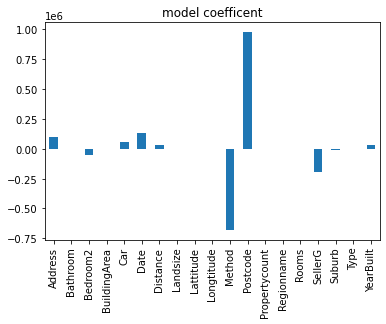

In [105]:
coef=pd.Series(l.coef_,x_train.columns.sort_values())
coef.plot(kind="bar",title="model coefficent")
plt.show()

In [106]:
coef

Address           99218.945688
Bathroom              0.000133
Bedroom2         -52820.821902
BuildingArea       1901.175395
Car               54323.349627
Date             135846.851808
Distance          33764.427974
Landsize            247.929529
Lattitude          1413.368667
Longtitude        -1944.357609
Method          -678682.547263
Postcode         976664.942152
Propertycount        -1.326697
Regionname         -323.193386
Rooms                -1.170713
SellerG         -198087.252928
Suburb            -9119.023041
Type               -125.711573
YearBuilt         27668.101062
dtype: float64